In [1]:
import numpy as np
import scipy.stats as ss
import elfi
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import acm2017_pyabc
from acm2017_pyabc.examples import clinic
from acm2017_pyabc.plots import plot_marginals, plot_particles
%matplotlib notebook

In [2]:
simulator = clinic.simulator

# Set the generating parameters that we will try to infer
lambda0 = 1/10

# Generate some dat9 (using a fixed seed here)
np.random.seed(1228)
y0 = simulator(lambda0)
print(y0)

closing_time, nr_patients, nr_waiting_patients = clinic.summaries

# prior over rate parameter
rate = acm2017_pyabc.Prior('uniform', 0.01,1.5, name='rate')
rate.name

[[49], array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.42344354,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   4.51585521,   0.        ,
         4.34929369,   5.33611555,   4.79045358,  11.19269357,
        10.47966238,   6.52416327,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   5.97595535,   8.83547883,
         0.        ,   0.        ,   0.        ,   0.29101362,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,   0.        ]), [964.8378133280579]]


'rate'

In [3]:
domain = [(0.01, 1.4)]
bolfi = acm2017_pyabc.BOLFI(priors=[rate], simulator=simulator, 
                             summaries=[closing_time, nr_patients, nr_waiting_patients],
                             observation=y0,
                   domain=domain)

In [4]:
bolfi.sample(nr_samples=1000, threshold=0.05, n_chains=10)

BOLFI sampler started with threshold: 0.05 and number of samples: 1000
Starting Bayesian Optimization
Starting MCMC sampling with approximative likelihood
Samples:   1000 - Threshold: keiner - Iterations:       1010 - Acceptance rate: 0.732673 - Time:    26.45 s


<IPython.core.display.Javascript object>


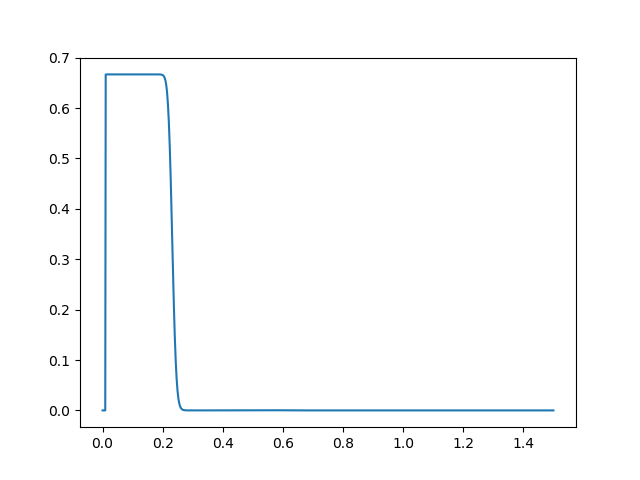

In [5]:
import scipy.stats as ss
def loglikelihood(theta, h=0.01):
    # eqn 47 from BOLFI paper
    m, s = bolfi._bolfi.model.predict(theta)
    # F = gaussian cdf, see eqn 28 in BOLFI paper
    return ss.norm.logcdf((h - m) / s).flatten()

logposterior = lambda theta: loglikelihood(np.atleast_1d(theta)) + rate.logpdf(theta)

x = np.linspace(0,1.5, 1000)
y = [np.exp(logposterior(x_i)) for x_i in x]
plt.figure()
#plt.hist(bolfi.Thetas, normed=True)
plt.plot(x,y)
plt.show()

In [6]:
bolfi.Thetas

array([[ 0.07760791],
       [ 0.07111913],
       [ 0.05139312],
       [ 0.04140685],
       [ 0.0187282 ],
       [ 0.04704288],
       [ 0.04704288],
       [ 0.06093247],
       [ 0.06093247],
       [ 0.06093247],
       [ 0.06093247],
       [ 0.07733118],
       [ 0.10372634],
       [ 0.10101012],
       [ 0.09081097],
       [ 0.09111573],
       [ 0.09076745],
       [ 0.09839619],
       [ 0.09839619],
       [ 0.10880238],
       [ 0.10880238],
       [ 0.16241103],
       [ 0.16241103],
       [ 0.16241103],
       [ 0.16241103],
       [ 0.16241103],
       [ 0.16241103],
       [ 0.16162877],
       [ 0.16162877],
       [ 0.16162877],
       [ 0.17908477],
       [ 0.21451353],
       [ 0.21451353],
       [ 0.21451353],
       [ 0.21451353],
       [ 0.17553998],
       [ 0.02209054],
       [ 0.06880372],
       [ 0.09706732],
       [ 0.09810228],
       [ 0.09810228],
       [ 0.09810228],
       [ 0.08325894],
       [ 0.03928281],
       [ 0.04787593],
       [ 0

<IPython.core.display.Javascript object>


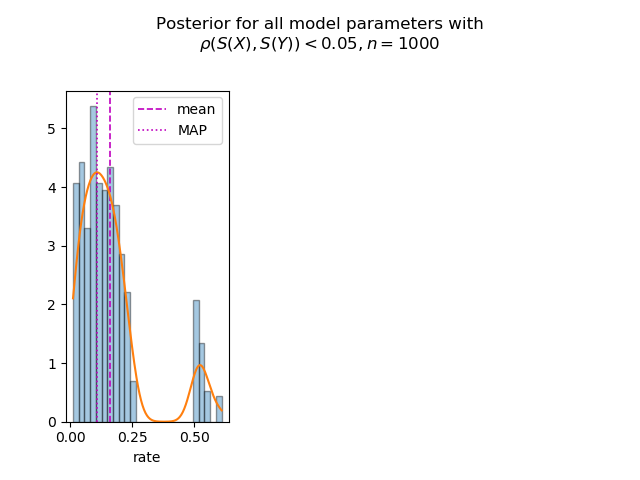

In [6]:
plot_marginals(bolfi, normed=True)

<IPython.core.display.Javascript object>


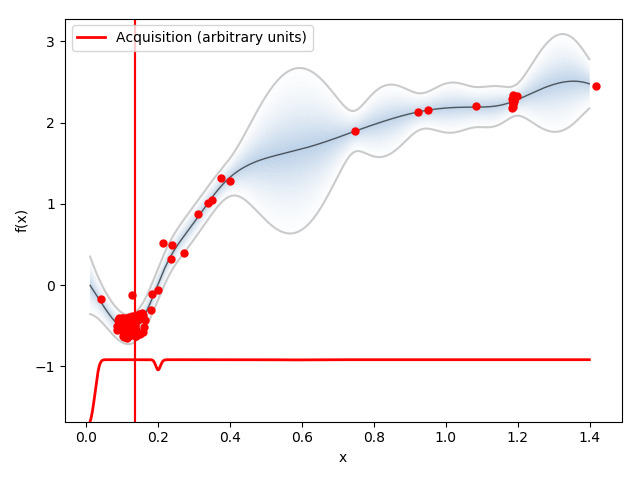

In [7]:
bolfi.bolfi.plot_acquisition()